In [1]:
import pandas as pd
import numpy as np
import keras
import os
import random
import cv2
from math import sqrt, floor


In [2]:
def pull_random_pixels(samples_per_class, pixels_per_sample):
    total_pixels= samples_per_class*pixels_per_sample
    random_pixels= np.zeros((total_pixels, 3), dtype=np.uint8)
    for i in range(samples_per_class):
        random_image = os.path.join(path, random.choice(os.listdir(path)))
        img= cv2.imread(random_image)
        img= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img=np.reshape(img, (img.shape[0]*img.shape[1], 3))
        new_pixels= img[np.random.randint(0, img.shape[0], pixels_per_sample)]
        
        start_index=pixels_per_sample*(0*samples_per_class+i)
#         print(start_index)
#         print(random_pixels.shape)
#         print(new_pixels.shape)
        random_pixels[start_index:start_index+pixels_per_sample,:]= new_pixels
    h= floor(sqrt(total_pixels))
    w= total_pixels//h
    
    random_pixels= random_pixels[np.random.choice(total_pixels, h*w, replace=False)]
    random_pixels= np.reshape(random_pixels, (h, w, 3))
    return random_pixels
        

In [3]:
path = '/home/alao/ml/dataset/plantvillage/raw/segmented/Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot'
path                         

'/home/alao/ml/dataset/plantvillage/raw/segmented/Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot'

0
(500, 3)
(50, 3)
50
(500, 3)
(50, 3)
100
(500, 3)
(50, 3)
150
(500, 3)
(50, 3)
200
(500, 3)
(50, 3)
250
(500, 3)
(50, 3)
300
(500, 3)
(50, 3)
350
(500, 3)
(50, 3)
400
(500, 3)
(50, 3)
450
(500, 3)
(50, 3)


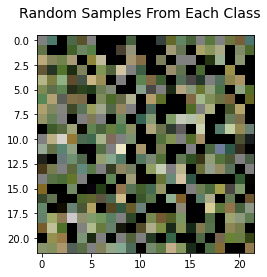

In [19]:
random_pixels = pull_random_pixels(10, 50)

plt.figure()
plt.suptitle('Random Samples From Each Class', fontsize=14, horizontalalignment='center')
plt.imshow(random_pixels)
plt.show()

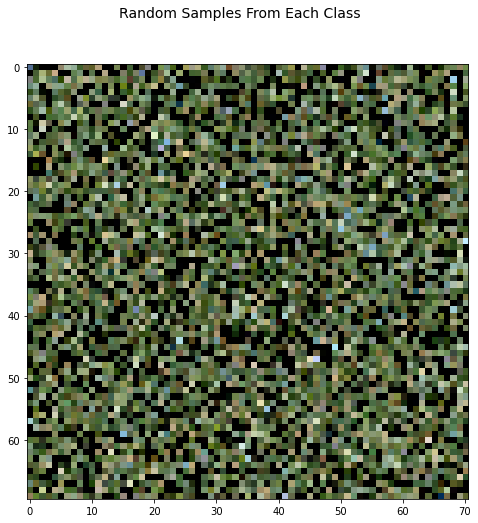

In [58]:
random_pixels = pull_random_pixels(100, 50)

plt.figure(figsize=(8, 8))
plt.suptitle('Random Samples From Each Class', fontsize=14, horizontalalignment='center')
plt.imshow(random_pixels)
plt.show()

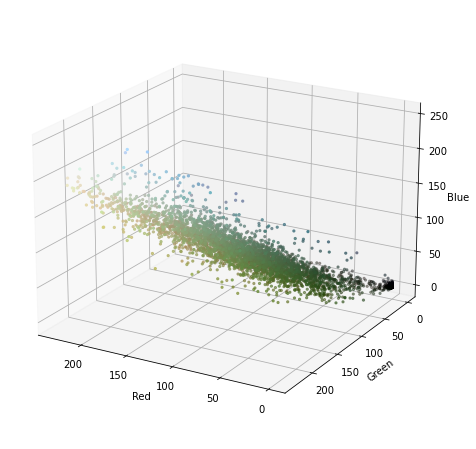

In [5]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

r, g, b = cv2.split(random_pixels)
fig = plt.figure(figsize=(8, 8))
axis = fig.add_subplot(1, 1, 1, projection="3d")
axis.view_init(20, 120)

pixel_colors = random_pixels.reshape((np.shape(random_pixels)[0]*np.shape(random_pixels)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()


axis.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
plt.show()

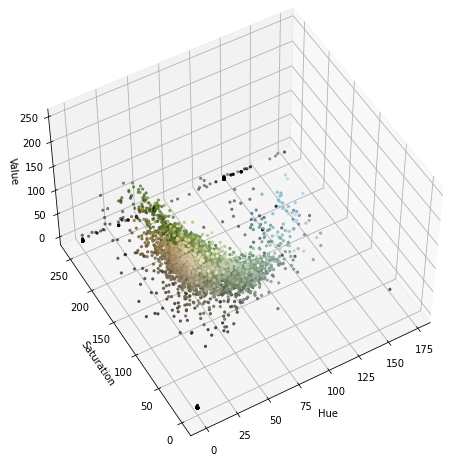

In [6]:
hsv_img = cv2.cvtColor(np.uint8(random_pixels), cv2.COLOR_RGB2HSV)

h, s, v = cv2.split(hsv_img)
fig = plt.figure(figsize=(8,8))
axis = fig.add_subplot(1, 1, 1, projection="3d")
axis.view_init(50, 240)



axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()

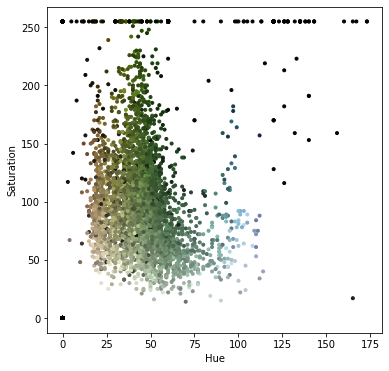

In [14]:
hsv_img = cv2.cvtColor(np.uint8(random_pixels), cv2.COLOR_RGB2HSV)

h, s, v = cv2.split(hsv_img)
fig = plt.figure(figsize=(6,6))
axis = fig.add_subplot(1, 1, 1)

axis.scatter(h.flatten(), s.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
# plt.xticks(range(0, 175))
plt.show()